# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [51]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# 設定 data_path
dir_data = './data/'

In [52]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

unique()&nunique()  
https://stackoverflow.com/questions/56310788/different-outcome-using-pandas-nunique-and-unique

In [53]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

print(app_train[0:1]['SK_ID_CURR'])#單純print出某一格

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
        #if app_train[col].nunique() <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
#             print(col)
#             print(app_train[col])
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

0    100002
Name: SK_ID_CURR, dtype: int64
(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


replace(inplace)  
https://www.itread01.com/content/1541747646.html

In [54]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
print(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64


### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [55]:
# 觀察相關係數
Corr_with_TG = app_train.corr()['TARGET']
print(Corr_with_TG)

SK_ID_CURR                   -0.002108
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.030896
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
DAYS_EMPLOYED_ANOM           -0.045987
Name: TARGET, Length: 110, dtype: float64


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [56]:
#print(type(Corr_with_TG)) #<class 'pandas.core.series.Series'>
Corr_sorted = Corr_with_TG.sort_values(ascending=True)
Min_15_corr = Corr_sorted.head(15) 
Max_15_corr = Corr_sorted.tail(15) 
print('Min_15_corr:')
print(Min_15_corr)
print('Max_15_corr:')
print(Max_15_corr)

Min_15_corr:
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64
Max_15_corr:
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994


.plot()  
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html  
plt.subplot(rows,cols,position)

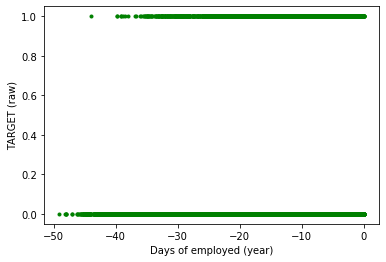

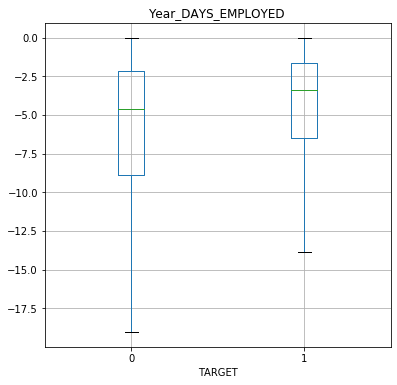

Correlation: 0.0750


In [64]:
#DAYS_EMPLOYED with TARGET
sub_df = app_train[app_train['DAYS_EMPLOYED'].notnull()] # 即not NAN的意思
#scatter===================
sub_df['Year_DAYS_EMPLOYED'] = sub_df['DAYS_EMPLOYED'] / 365 #新增year欄位 
#sub_df['DAYS_EMPLOYED'] = abs(sub_df['DAYS_EMPLOYED'])/ 365 #不新增year欄位直接取代原欄位
plt.plot(sub_df['Year_DAYS_EMPLOYED'], sub_df['TARGET'], 'g.')
plt.xlabel('Days of employed (year)')
plt.ylabel('TARGET (raw)')
plt.show()

#boxplot==================== 以下寫法可參照Day13HW
plt_column = 'Year_DAYS_EMPLOYED' 
plt_by = 'TARGET' 
sub_df.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(6,6))
plt.suptitle('')
plt.show()

#correlation
corr = np.corrcoef(sub_df['Year_DAYS_EMPLOYED'], sub_df['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))

State: DAYS_EMPLOYED越低，越有還貸款的困難

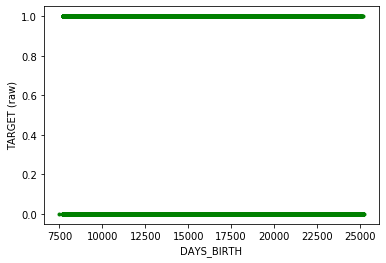

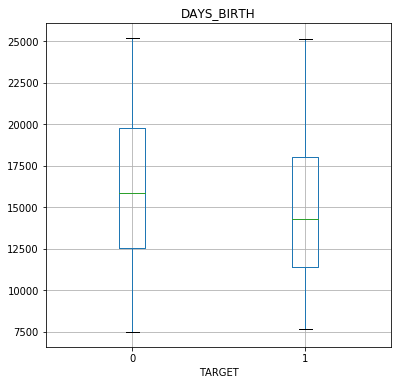

Correlation: -0.0782


In [65]:
#DAYS_BIRTH_with_TARGET
sub_df = app_train[app_train['DAYS_BIRTH'].notnull()] # 即not NAN的意思
#scatter===================
plt.plot(sub_df['DAYS_BIRTH'], sub_df['TARGET'], 'g.')
plt.xlabel('DAYS_BIRTH')
plt.ylabel('TARGET (raw)')
plt.show()

#boxplot==================== 以下寫法可參照Day13HW
plt_column = 'DAYS_BIRTH' 
plt_by = 'TARGET' 
sub_df.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(6,6))
plt.suptitle('')
plt.show()

#correlation
corr = np.corrcoef(sub_df['DAYS_BIRTH'], sub_df['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))

State: 越年長(DAYS_BIRTH)越有能力還貸款